In [97]:
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples=100
                          ,n_features=2,
                          n_classes=2,
                          n_informative=2,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          hypercube=False,
                          class_sep=20,
                          random_state=30
                          )

In [98]:
import matplotlib.pyplot as plt

In [99]:
x.shape,y.shape

((100, 2), (100,))

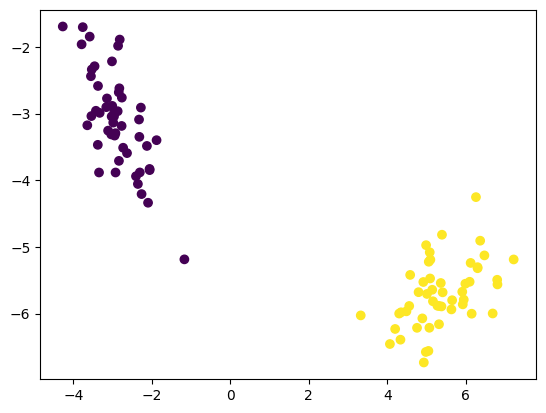

In [100]:
plt.scatter(x[:,0],x[:,1],c=y)

In [101]:
y.size

100

In [102]:
def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights= np.ones(x.shape[1])
    lr =0.01
    epoch =100000

    for j in range(epoch):
        j = np.random.randint(0,y.size)
        y_hat = 1 if (np.dot(x[j],weights) >0) else 0
        weights = weights + lr * (y[j]-y_hat)*x[j]

    return weights[0],weights[1:]

In [103]:
intercept_,coefficient_=perceptron(x,y)
intercept_,coefficient_

(1.04, array([1.1588562 , 0.75290636]))

In [104]:
m = -1*( coefficient_[0]/coefficient_[1])
b = -1*(intercept_/coefficient_[1])

In [105]:
np.min(x),np.max(x)

(-6.732219598275939, 7.2183378130923135)

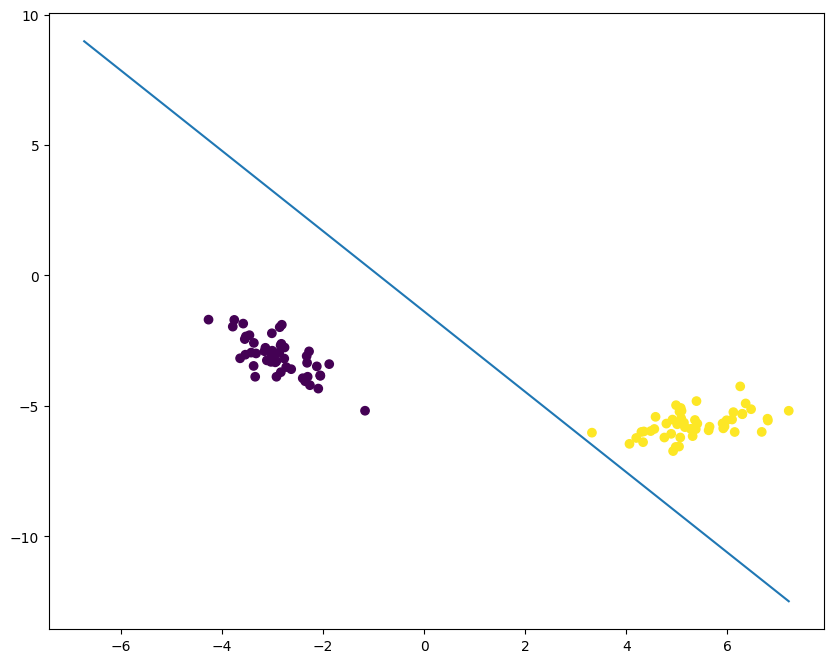

In [106]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c=y)
x_new = np.linspace(np.min(x),np.max(x),x.shape[0])
y_new = m*x_new+b
plt.plot(x_new,y_new)

In [107]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = 1 if (np.dot(X[j],weights) >0) else 0
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [108]:
m,b = perceptron(x,y)


In [109]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

MovieWriter ffmpeg unavailable; using Pillow instead.


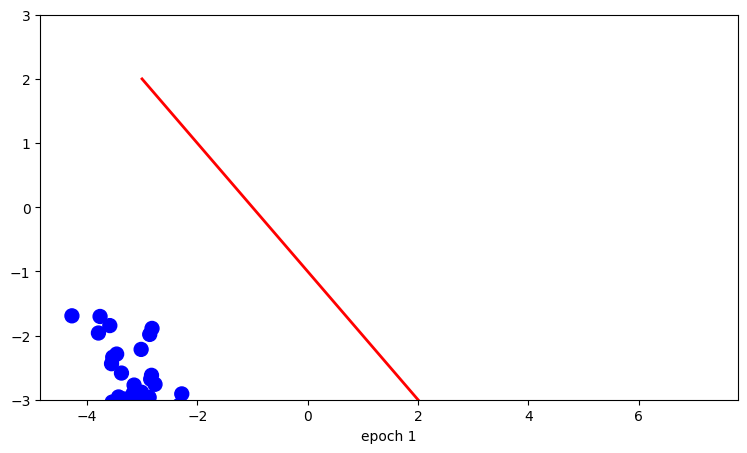

In [110]:
# %matplotlib qt 
# 
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=False, frames=200, interval=100)
anim.save("anim.gif")


In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lr = LogisticRegression()

In [113]:
lr.fit(x,y)
intercept_,coefficient_=lr.intercept_,lr.coef_
m =-( coefficient_[0][0]/coefficient_[0][1])
b =-( intercept_/coefficient_[0][1])

In [114]:
y_new_1 = m*x_new +b

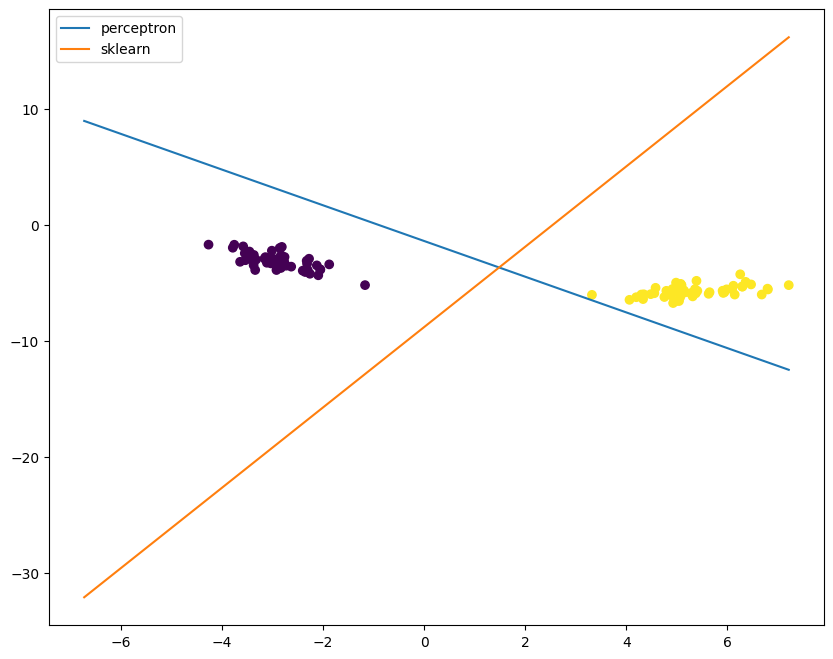

In [115]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_new,y_new,label='perceptron')
plt.plot(x_new,y_new_1,label='sklearn')
plt.legend()
plt.show()